## 생육정보 EDA

- 데이터 구조 파악
- 컬럼의 종속성 (PK) 파악

### 필요한 라이브러리 불러오기

In [1]:
# 표준 라이브러리
import sys
from pathlib import Path
from typing import List, Dict
from itertools import combinations

# 서드파티 라이브러리
import pandas as pd
import plotly.express as px
import numpy as np

# 로컬 모듈
sys.path.append(str(Path.cwd().parent))
from utils import DATA_DIR, growth_map, energy_map
from utils import eda_missing_data, eda_duplicates, plot_features

In [2]:
import platform
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

mpl.rcParams['axes.unicode_minus'] = False

# 폰트 개인 경로에 맞춰서 변경
# FONT_DIR = Path("/path/to/fonts")
# font_path = FONT_DIR / 'FREESENTATION-6SEMIBOLD.ttf'
# prop = fm.FontProperties(fname=font_path)

### 생육정보 원본 데이터 불러오기

In [3]:
pandas_kwargs = {
    'memory_map': True,
    'encoding': 'cp949',
    'parse_dates': ['measDate'],
    'date_format': '%Y-%m-%d'
}

growth_data: pd.DataFrame = pd.read_csv(DATA_DIR / 'raw' / '22_생육정보.csv', **pandas_kwargs)
growth_data.head()

,measDate,farm_cde,itemCode,flowerTop,grwtLt,lefCunt,lefLt,lefBt,stemThck,flanGrupp,frtstGrupp,hvstGrupp,frtstCo
0,2022-09-26,천지인술,80300.0,NaN,20.00,NaN,NaN,NaN,8.539,NaN,NaN,NaN,NaN
1,2022-10-04,천지인술,80300.0,21.92,28.32,8.5,38.35,26.33,9.600,0.54,0.02,0.0,0.1
2,2022-10-10,천지인술,80300.0,24.51,21.71,10.5,40.18,29.04,9.992,1.32,0.82,0.0,4.3
3,2022-10-17,천지인술,80300.0,20.02,26.40,13.2,42.72,38.45,12.529,2.28,1.72,0.0,7.1
4,2022-10-24,천지인술,80300.0,33.93,26.17,13.9,45.76,43.02,10.842,2.96,2.46,0.0,9.5


In [4]:
# 생육정보 데이터 크기: 특히 행 개수는 중복 체크 때 중요
display(growth_data.shape)

# 생육정보 컬럼들: 컬럼 파악 및 복사 붙이기 용도
display(growth_data.columns)

(48, 13)

Index(['measDate', 'farm_cde', 'itemCode', 'flowerTop', 'grwtLt', 'lefCunt',
       'lefLt', 'lefBt', 'stemThck', 'flanGrupp', 'frtstGrupp', 'hvstGrupp',
       'frtstCo'],
      dtype='object')

### 생육정보 결측치 탐색

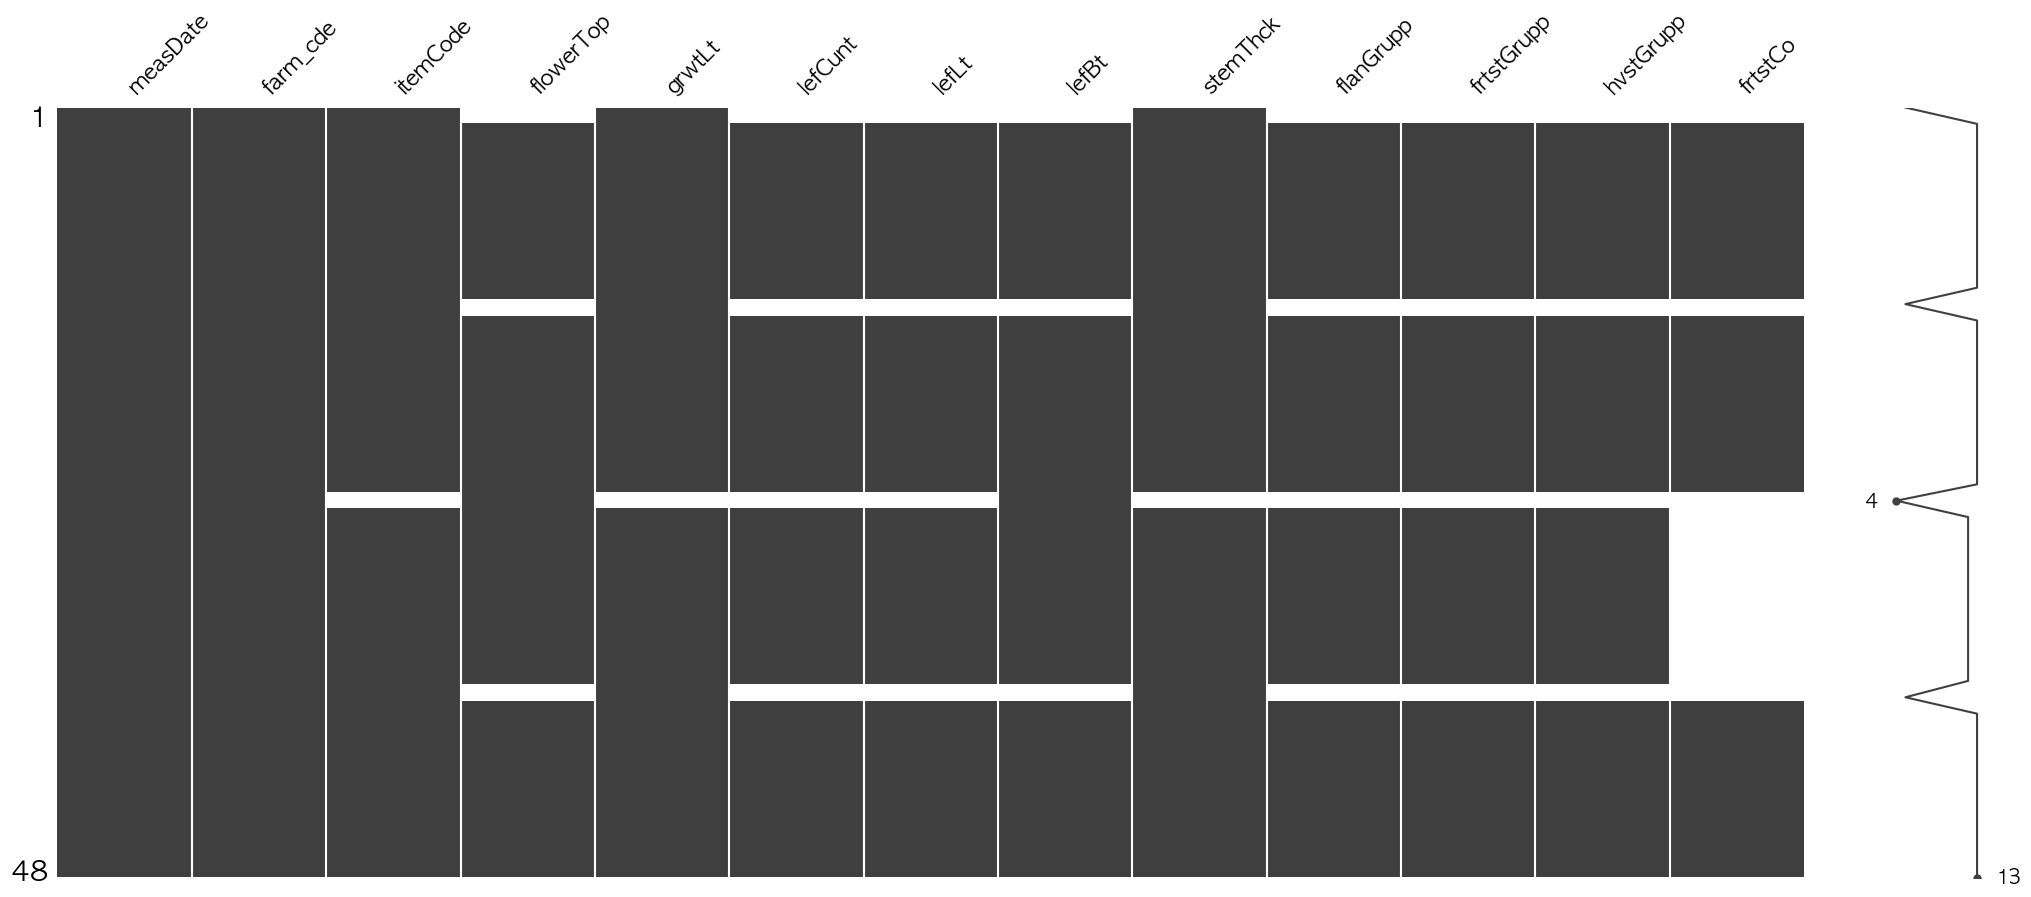

measDate       0
farm_cde       0
itemCode       1
flowerTop      3
grwtLt         1
lefCunt        4
lefLt          4
lefBt          3
stemThck       1
flanGrupp      4
frtstGrupp     4
hvstGrupp      4
frtstCo       15
dtype: int64

In [5]:
eda_missing_data(growth_data)

### 생육정보 PK 탐색

In [6]:
# 생육정보 중복 정보 
display(growth_data.duplicated().value_counts())

False    48
Name: count, dtype: int64

In [7]:
growth_data

,measDate,farm_cde,itemCode,flowerTop,grwtLt,lefCunt,lefLt,lefBt,stemThck,flanGrupp,frtstGrupp,hvstGrupp,frtstCo
0,2022-09-26,천지인술,80300.00,NaN,20.00,NaN,NaN,NaN,8.539,NaN,NaN,NaN,NaN
1,2022-10-04,천지인술,80300.00,21.92,28.32,8.500,38.35,26.330,9.600,0.540,0.02,0.00,0.1
2,2022-10-10,천지인술,80300.00,24.51,21.71,10.500,40.18,29.040,9.992,1.320,0.82,0.00,4.3
3,2022-10-17,천지인술,80300.00,20.02,26.40,13.200,42.72,38.450,12.529,2.280,1.72,0.00,7.1
4,2022-10-24,천지인술,80300.00,33.93,26.17,13.900,45.76,43.020,10.842,2.960,2.46,0.00,9.5
5,2022-10-31,천지인술,80300.00,23.01,19.19,13.700,41.69,37.220,9.175,3.960,3.36,0.00,12.2
6,2022-11-07,천지인술,80300.00,17.14,18.28,14.400,37.19,34.480,9.019,4.460,3.98,0.00,14.7
7,2022-11-14,천지인술,80300.00,15.78,9.04,14.000,38.04,30.360,6.585,5.200,4.64,0.00,17.9
8,2022-11-21,천지인술,80300.00,22.99,14.75,15.800,39.91,39.010,7.371,5.340,5.08,0.02,20.1
9,2022-11-28,천지인술,80300.00,38.93,19.61,14.100,40.48,42.080,8.802,5.360,5.24,0.08,19.8


In [8]:
# 단일 PK 탐색
farm_cond = growth_data['farm_cde'] == '이삭줍는 알파고'
growth_data[farm_cond]

,measDate,farm_cde,itemCode,flowerTop,grwtLt,lefCunt,lefLt,lefBt,stemThck,flanGrupp,frtstGrupp,hvstGrupp,frtstCo
24,2022-09-26,이삭줍는 알파고,NaN,200.00,NaN,NaN,NaN,8.480,NaN,NaN,NaN,NaN,NaN
25,2022-10-04,이삭줍는 알파고,23.79,24.65,7.8,32.270,22.27,9.680,0.20,0.000,0.00,0.0,NaN
26,2022-10-10,이삭줍는 알파고,20.03,19.39,11.2,32.590,26.06,9.780,1.38,0.840,0.00,4.2,NaN
27,2022-10-17,이삭줍는 알파고,17.91,22.69,13.4,26.923,23.04,9.676,2.32,1.880,0.00,8.3,NaN
28,2022-10-24,이삭줍는 알파고,23.20,16.54,14.7,29.840,24.74,8.394,3.02,2.540,0.00,10.5,NaN
29,2022-10-31,이삭줍는 알파고,19.44,15.18,17.1,28.620,23.82,6.466,3.88,3.140,0.00,13.3,NaN
30,2022-11-07,이삭줍는 알파고,12.35,11.45,19.6,26.290,20.97,5.136,4.32,3.860,0.00,17.0,NaN
31,2022-11-14,이삭줍는 알파고,28.15,14.28,19.9,28.350,22.45,7.252,4.82,4.560,0.00,21.1,NaN
32,2022-11-21,이삭줍는 알파고,16.08,14.35,19.4,29.720,21.93,6.162,5.50,4.820,0.26,19.1,NaN
33,2022-11-28,이삭줍는 알파고,20.65,16.30,18.0,31.330,25.64,7.453,6.00,5.305,0.56,21.7,NaN


In [9]:
# 이중 PK 탐색 (정의서에 필수라고 적힌 세 가지 column 기준)
columns = ['measDate', 'farm_cde', 'itemCode']

for cols in combinations(columns, 2):
    print('='*50)
    print(f'{"와 ".join([growth_map[col] for col in cols])}의 PK 검사')
    print('='*50)
    display(growth_data.duplicated(subset=cols).value_counts())

측정일와 온실번호의 PK 검사


False    48
Name: count, dtype: int64

측정일와 품목코드의 PK 검사


False    24
True     24
Name: count, dtype: int64

온실번호와 품목코드의 PK 검사


True     33
False    15
Name: count, dtype: int64

In [10]:
# itemCode가 한 종류가 아니므로 체크
growth_data['itemCode'].value_counts()

itemCode
80300.00    36
23.79        1
20.03        1
17.91        1
23.20        1
19.44        1
12.35        1
28.15        1
16.08        1
20.65        1
24.69        1
29.49        1
Name: count, dtype: int64

## 토마토 생육 정보만 EDA

In [11]:
tomato_cond = growth_data['itemCode'] == 80300
tomato_data: pd.DataFrame = growth_data[tomato_cond].copy()

tomato_data

,measDate,farm_cde,itemCode,flowerTop,grwtLt,lefCunt,lefLt,lefBt,stemThck,flanGrupp,frtstGrupp,hvstGrupp,frtstCo
0,2022-09-26,천지인술,80300.0,NaN,20.00,NaN,NaN,NaN,8.539,NaN,NaN,NaN,NaN
1,2022-10-04,천지인술,80300.0,21.92,28.32,8.5,38.35,26.33,9.600,0.54,0.02,0.00,0.1
2,2022-10-10,천지인술,80300.0,24.51,21.71,10.5,40.18,29.04,9.992,1.32,0.82,0.00,4.3
3,2022-10-17,천지인술,80300.0,20.02,26.40,13.2,42.72,38.45,12.529,2.28,1.72,0.00,7.1
4,2022-10-24,천지인술,80300.0,33.93,26.17,13.9,45.76,43.02,10.842,2.96,2.46,0.00,9.5
5,2022-10-31,천지인술,80300.0,23.01,19.19,13.7,41.69,37.22,9.175,3.96,3.36,0.00,12.2
6,2022-11-07,천지인술,80300.0,17.14,18.28,14.4,37.19,34.48,9.019,4.46,3.98,0.00,14.7
7,2022-11-14,천지인술,80300.0,15.78,9.04,14.0,38.04,30.36,6.585,5.20,4.64,0.00,17.9
8,2022-11-21,천지인술,80300.0,22.99,14.75,15.8,39.91,39.01,7.371,5.34,5.08,0.02,20.1
9,2022-11-28,천지인술,80300.0,38.93,19.61,14.1,40.48,42.08,8.802,5.36,5.24,0.08,19.8


### 토마토 생육정보 결측치 검사

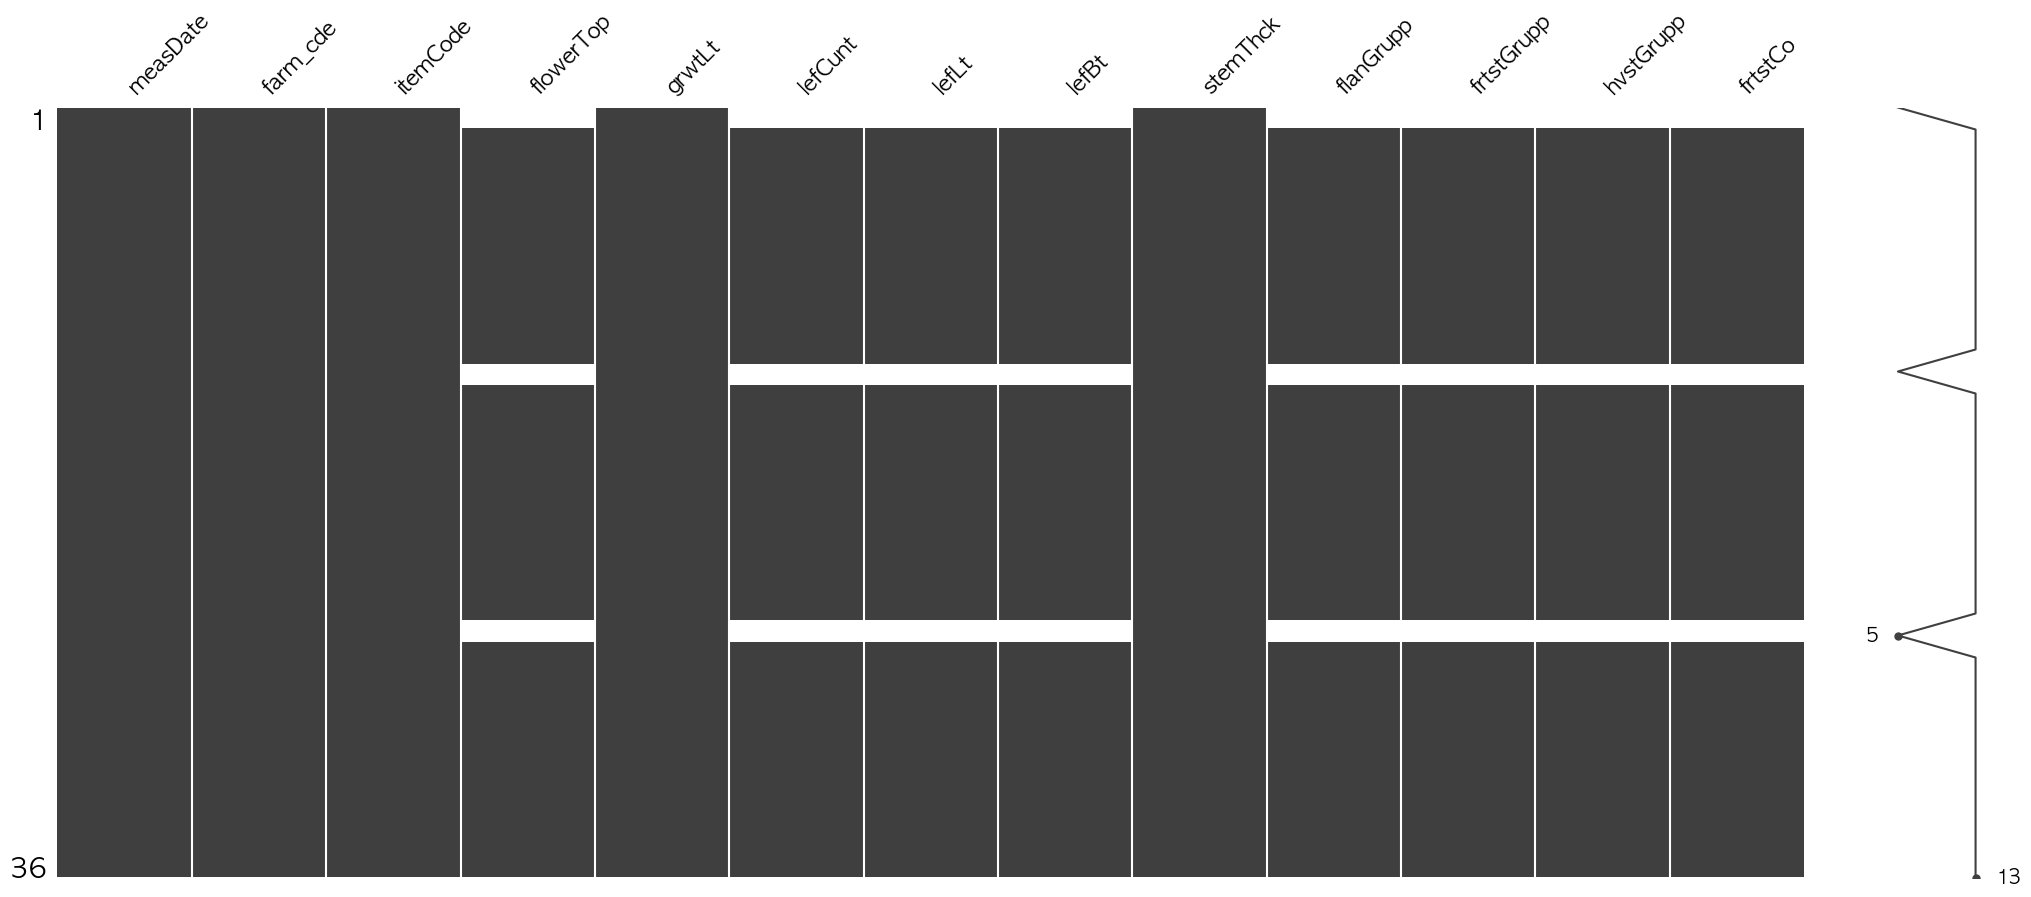

measDate      0
farm_cde      0
itemCode      0
flowerTop     3
grwtLt        0
lefCunt       3
lefLt         3
lefBt         3
stemThck      0
flanGrupp     3
frtstGrupp    3
hvstGrupp     3
frtstCo       3
dtype: int64

In [12]:
# 결측치 검사: 필터링 이후에 결측치 처리 판단이 달라질 수 있기 때문에
eda_missing_data(tomato_data)

### 토마토 생육정보 PK 검사

In [13]:
columns = ['measDate', 'farm_cde']
eda_duplicates(tomato_data, columns, growth_map)

'=================================================='

'컬럼 1개 PK 검사'

'=================================================='

'측정일의 PK 검사'

True     24
False    12
Name: count, dtype: int64

'온실번호의 PK 검사'

True     33
False     3
Name: count, dtype: int64

'=================================================='

'컬럼 2개 PK 검사'

'=================================================='

'측정일와 온실번호의 PK 검사'

False    36
Name: count, dtype: int64

### 토마토 생육정보 각 컬럼 시각화

In [14]:
tomato_mapping_data = tomato_data.rename(columns=growth_map, copy=True)
tomato_mapping_data

,측정일,온실번호,품목코드,화방높이(cm),생장길이(cm),엽수(개),엽장(cm),엽폭(cm),줄기직경(mm),개화수준(점),착과수준(점),수확중 화방수준(점),열매수(개)
0,2022-09-26,천지인술,80300.0,NaN,20.00,NaN,NaN,NaN,8.539,NaN,NaN,NaN,NaN
1,2022-10-04,천지인술,80300.0,21.92,28.32,8.5,38.35,26.33,9.600,0.54,0.02,0.00,0.1
2,2022-10-10,천지인술,80300.0,24.51,21.71,10.5,40.18,29.04,9.992,1.32,0.82,0.00,4.3
3,2022-10-17,천지인술,80300.0,20.02,26.40,13.2,42.72,38.45,12.529,2.28,1.72,0.00,7.1
4,2022-10-24,천지인술,80300.0,33.93,26.17,13.9,45.76,43.02,10.842,2.96,2.46,0.00,9.5
5,2022-10-31,천지인술,80300.0,23.01,19.19,13.7,41.69,37.22,9.175,3.96,3.36,0.00,12.2
6,2022-11-07,천지인술,80300.0,17.14,18.28,14.4,37.19,34.48,9.019,4.46,3.98,0.00,14.7
7,2022-11-14,천지인술,80300.0,15.78,9.04,14.0,38.04,30.36,6.585,5.20,4.64,0.00,17.9
8,2022-11-21,천지인술,80300.0,22.99,14.75,15.8,39.91,39.01,7.371,5.34,5.08,0.02,20.1
9,2022-11-28,천지인술,80300.0,38.93,19.61,14.1,40.48,42.08,8.802,5.36,5.24,0.08,19.8


In [83]:
alphago_cond = growth_data['farm_cde'] == '이삭줍는 알파고'
alphago_data = growth_data[alphago_cond].copy()

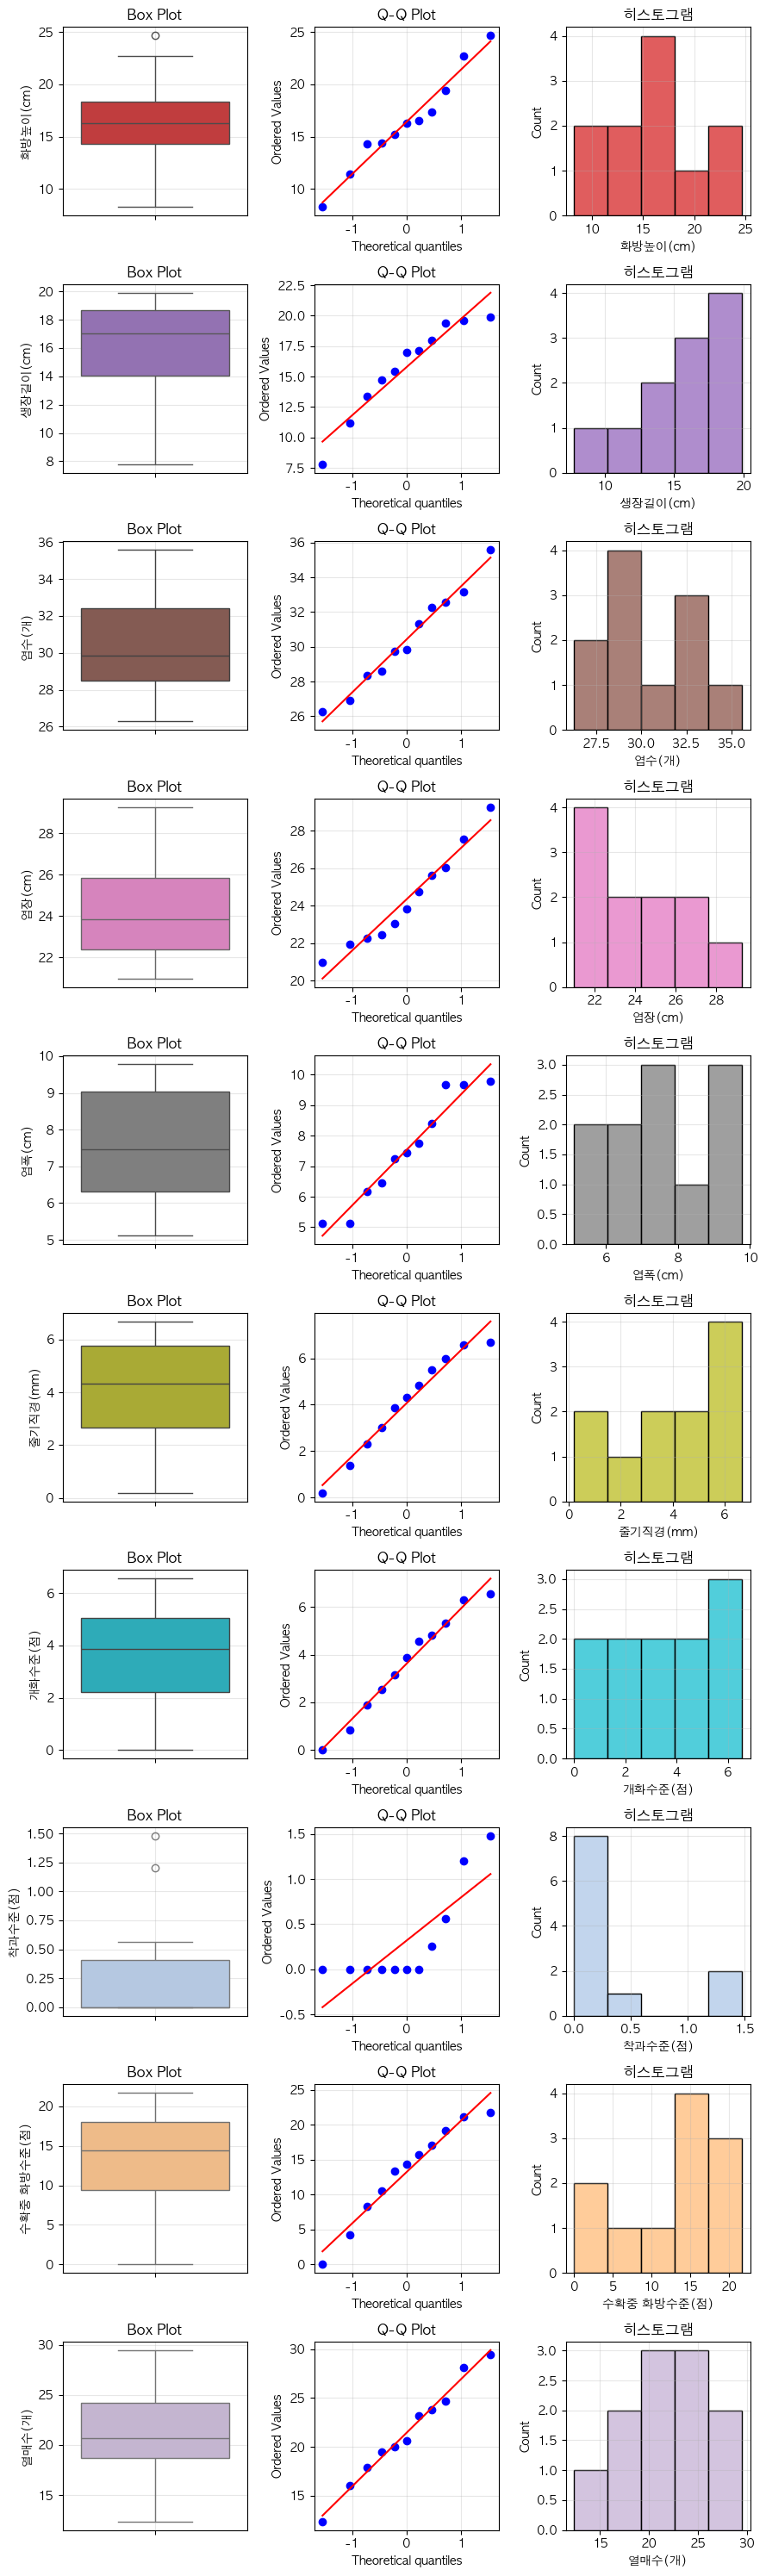

In [85]:
features = ["화방높이(cm)", "생장길이(cm)", "엽수(개)", "엽장(cm)", "엽폭(cm)", "줄기직경(mm)", "개화수준(점)", "착과수준(점)", "수확중 화방수준(점)", "열매수(개)"]


colors = [
    # "#1f77b4",  # measDate
    # "#ff7f0e",  # farm_cde
    # "#2ca02c",  # itemCode
    "#d62728",  # flowerTop
    "#9467bd",  # grwtLt
    "#8c564b",  # lefCunt
    "#e377c2",  # lefLt
    "#7f7f7f",  # lefBt
    "#bcbd22",  # stemThck
    "#17becf",  # flanGrupp
    "#aec7e8",  # frtstGrupp
    "#ffbb78",  # hvstGrupp
    "#c5b0d5"   # frtstCo
]

alphago_data['frtstCo'] = alphago_data['itemCode']
alphago_mapping_data = alphago_data.rename(columns=growth_map, copy=True)

# plot_features(tomato_mapping_data.dropna(), features, colors)
plot_features(alphago_mapping_data.dropna(), features, colors)

### 한 온실을 살펴보기

In [16]:
farm_cond = tomato_data['farm_cde'] == '천지인술'

tomato_data[farm_cond]

,measDate,farm_cde,itemCode,flowerTop,grwtLt,lefCunt,lefLt,lefBt,stemThck,flanGrupp,frtstGrupp,hvstGrupp,frtstCo
0,2022-09-26,천지인술,80300.0,NaN,20.00,NaN,NaN,NaN,8.539,NaN,NaN,NaN,NaN
1,2022-10-04,천지인술,80300.0,21.92,28.32,8.5,38.35,26.33,9.600,0.54,0.02,0.00,0.1
2,2022-10-10,천지인술,80300.0,24.51,21.71,10.5,40.18,29.04,9.992,1.32,0.82,0.00,4.3
3,2022-10-17,천지인술,80300.0,20.02,26.40,13.2,42.72,38.45,12.529,2.28,1.72,0.00,7.1
4,2022-10-24,천지인술,80300.0,33.93,26.17,13.9,45.76,43.02,10.842,2.96,2.46,0.00,9.5
5,2022-10-31,천지인술,80300.0,23.01,19.19,13.7,41.69,37.22,9.175,3.96,3.36,0.00,12.2
6,2022-11-07,천지인술,80300.0,17.14,18.28,14.4,37.19,34.48,9.019,4.46,3.98,0.00,14.7
7,2022-11-14,천지인술,80300.0,15.78,9.04,14.0,38.04,30.36,6.585,5.20,4.64,0.00,17.9
8,2022-11-21,천지인술,80300.0,22.99,14.75,15.8,39.91,39.01,7.371,5.34,5.08,0.02,20.1
9,2022-11-28,천지인술,80300.0,38.93,19.61,14.1,40.48,42.08,8.802,5.36,5.24,0.08,19.8


In [17]:
tomato_data

,measDate,farm_cde,itemCode,flowerTop,grwtLt,lefCunt,lefLt,lefBt,stemThck,flanGrupp,frtstGrupp,hvstGrupp,frtstCo
0,2022-09-26,천지인술,80300.0,NaN,20.00,NaN,NaN,NaN,8.539,NaN,NaN,NaN,NaN
1,2022-10-04,천지인술,80300.0,21.92,28.32,8.5,38.35,26.33,9.600,0.54,0.02,0.00,0.1
2,2022-10-10,천지인술,80300.0,24.51,21.71,10.5,40.18,29.04,9.992,1.32,0.82,0.00,4.3
3,2022-10-17,천지인술,80300.0,20.02,26.40,13.2,42.72,38.45,12.529,2.28,1.72,0.00,7.1
4,2022-10-24,천지인술,80300.0,33.93,26.17,13.9,45.76,43.02,10.842,2.96,2.46,0.00,9.5
5,2022-10-31,천지인술,80300.0,23.01,19.19,13.7,41.69,37.22,9.175,3.96,3.36,0.00,12.2
6,2022-11-07,천지인술,80300.0,17.14,18.28,14.4,37.19,34.48,9.019,4.46,3.98,0.00,14.7
7,2022-11-14,천지인술,80300.0,15.78,9.04,14.0,38.04,30.36,6.585,5.20,4.64,0.00,17.9
8,2022-11-21,천지인술,80300.0,22.99,14.75,15.8,39.91,39.01,7.371,5.34,5.08,0.02,20.1
9,2022-11-28,천지인술,80300.0,38.93,19.61,14.1,40.48,42.08,8.802,5.36,5.24,0.08,19.8


## 에너지사용정보 EDA

- 평균과 이상치 파악
- 온실 전체에 대해서
- 이상치가 나오는 온실에 대해서

In [18]:
pandas_kwargs = {
    'memory_map': True,
    'encoding': 'cp949',
    'parse_dates': ['measDate'],
    'date_format': '%Y-%m-%d'
}

energy_data: pd.DataFrame = pd.read_csv(DATA_DIR / 'raw' / '22_에너지사용정보.csv', **pandas_kwargs)
energy_data.head()

,measDate,farm_cde,water_usage,water_cost,fertilizer_usage,fertilizer_cost,heating_energy_usage,heating_energy_cost,CO2_usage,CO2_cost,mist_usage_time,mist_cost
0,2022-10-01,천지인술,1200,180,3632,4576,0,0,0,0,186,2172
1,2022-10-02,천지인술,90,13,288,362,0,0,0,0,0,0
2,2022-10-03,천지인술,440,66,1452,1829,0,0,0,0,0,0
3,2022-10-04,천지인술,600,90,1802,2270,0,0,0,0,0,0
4,2022-10-05,천지인술,1020,153,3064,3860,18620,1024,0,0,102,1191


In [19]:
# 에너지사용정보 데이터 크기: 특히 행 개수는 중복 체크 때 중요
display(energy_data.shape)

# 에너지사용정보 컬럼들: 컬럼 파악 및 복사 붙이기 용도
display(energy_data.columns)

(280, 12)

Index(['measDate', 'farm_cde', 'water_usage', 'water_cost', 'fertilizer_usage',
       'fertilizer_cost', 'heating_energy_usage', 'heating_energy_cost',
       'CO2_usage', 'CO2_cost', 'mist_usage_time', 'mist_cost'],
      dtype='object')

### 에너지사용정보 결측치 탐색

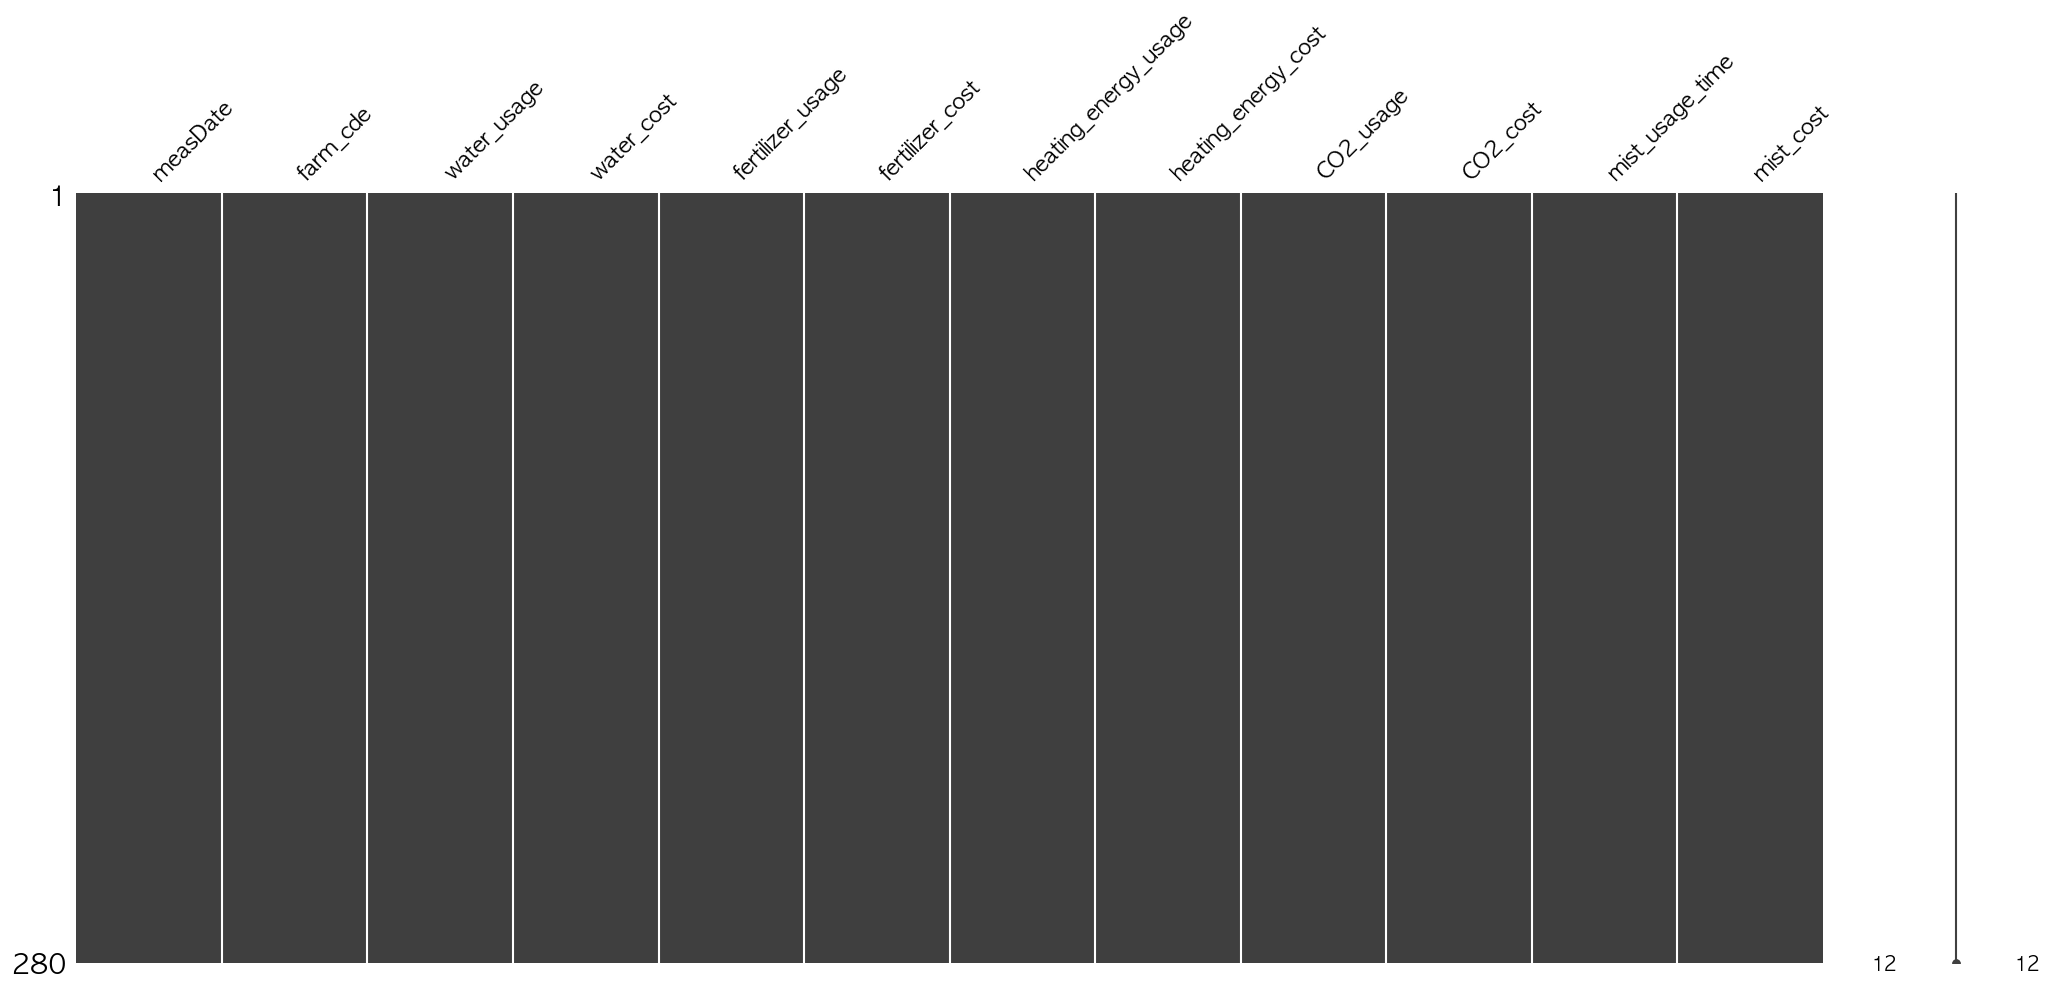

measDate                0
farm_cde                0
water_usage             0
water_cost              0
fertilizer_usage        0
fertilizer_cost         0
heating_energy_usage    0
heating_energy_cost     0
CO2_usage               0
CO2_cost                0
mist_usage_time         0
mist_cost               0
dtype: int64

In [20]:
eda_missing_data(energy_data)

In [21]:
# 에너지사용정보 중복 정보 
display(energy_data.duplicated().value_counts())

False    280
Name: count, dtype: int64

In [22]:
columns = ['measDate', 'farm_cde']
eda_duplicates(energy_data, columns, energy_map)

'=================================================='

'컬럼 1개 PK 검사'

'=================================================='

'측정일의 PK 검사'

True     210
False     70
Name: count, dtype: int64

'온실번호의 PK 검사'

True     276
False      4
Name: count, dtype: int64

'=================================================='

'컬럼 2개 PK 검사'

'=================================================='

'측정일와 온실번호의 PK 검사'

False    280
Name: count, dtype: int64

In [23]:
energy_mapping_data = energy_data.rename(columns=energy_map, copy=True)
energy_mapping_data

,측정일,온실번호,물사용량(L),물사용비용(원),비료사용량(L),비료사용비용(원),난방에너지사용량(kcal),난방에너지사용비용(원),CO₂사용량(L),CO₂사용비용(원),미스트사용시간(분),미스트사용비용(원)
0,2022-10-01,천지인술,1200,180,3632,4576,0,0,0,0,186,2172
1,2022-10-02,천지인술,90,13,288,362,0,0,0,0,0,0
2,2022-10-03,천지인술,440,66,1452,1829,0,0,0,0,0,0
3,2022-10-04,천지인술,600,90,1802,2270,0,0,0,0,0,0
4,2022-10-05,천지인술,1020,153,3064,3860,18620,1024,0,0,102,1191
...,...,...,...,...,...,...,...,...,...,...,...,...
275,2022-12-05,토마토명가,1690,253,4966,6257,102010,5610,0,0,14,163
276,2022-12-06,토마토명가,650,97,1976,2489,114815,6314,0,0,14,163
277,2022-12-07,토마토명가,1040,156,3029,3816,89470,4920,0,0,2,23
278,2022-12-08,토마토명가,1950,292,5226,6584,74880,4118,0,0,3,35


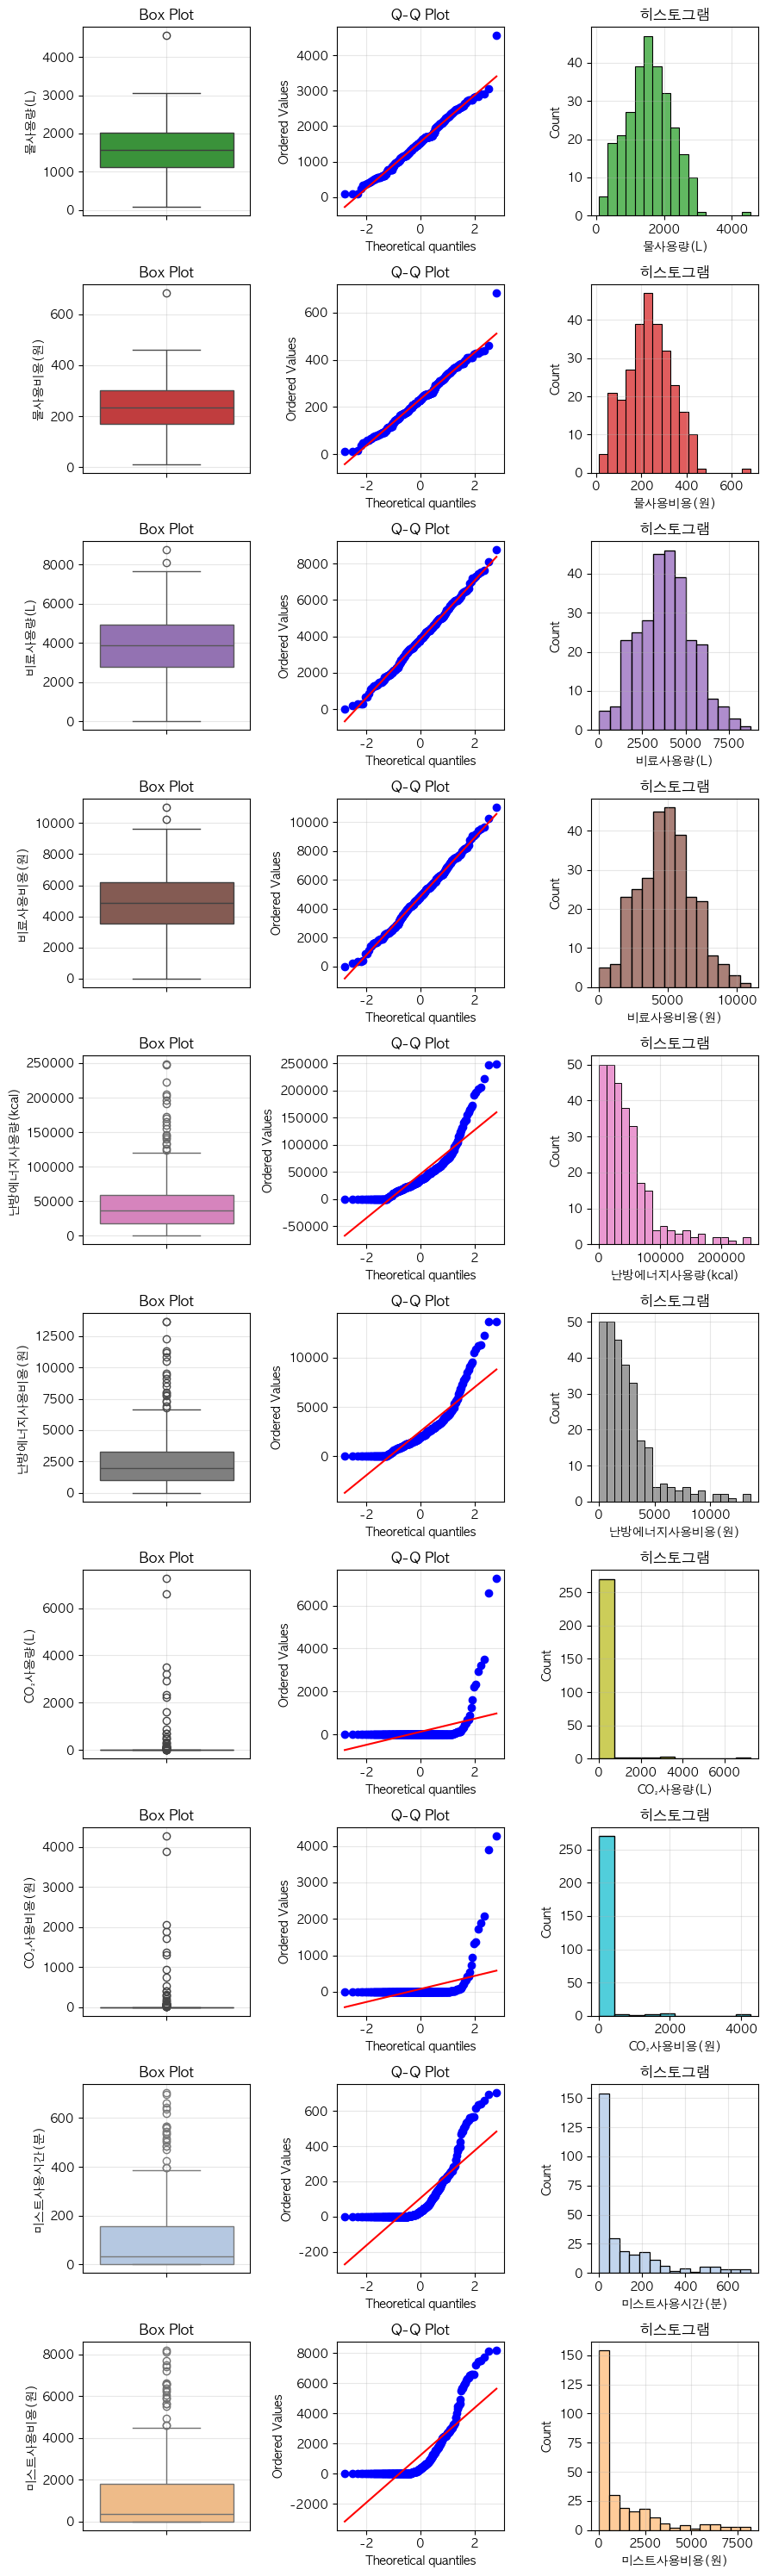

In [24]:
features = ["물사용량(L)", "물사용비용(원)", "비료사용량(L)", "비료사용비용(원)", "난방에너지사용량(kcal)", "난방에너지사용비용(원)", "CO₂사용량(L)", "CO₂사용비용(원)", "미스트사용시간(분)", "미스트사용비용(원)"]

colors = [
    # "#1f77b4",  # measDate
    # "#ff7f0e",  # farm_cde
    "#2ca02c",  # water_usage
    "#d62728",  # water_cost
    "#9467bd",  # fertilizer_usage
    "#8c564b",  # fertilizer_cost
    "#e377c2",  # heating_energy_usage
    "#7f7f7f",  # heating_energy_cost
    "#bcbd22",  # CO2_usage
    "#17becf",  # CO2_cost
    "#aec7e8",  # mist_usage_time
    "#ffbb78"   # mist_cost
]


plot_features(energy_mapping_data, features, colors)

## 환경정보 EDA

In [65]:
pandas_kwargs = {
    'memory_map': True,
    'encoding': 'cp949',
    'parse_dates': ['measDate'],
    'date_format': '%Y-%m-%d %H:%M:%S',
    'index_col': 0,
}

env_data: pd.DataFrame = pd.read_csv(DATA_DIR / 'raw' / '22_환경정보.csv', **pandas_kwargs)
env_data

/var/folders/zp/b80h2w41309d2z9qmnh381hw0000gn/T/ipykernel_25481/3589254538.py:9: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



,farm_cde,measDate,itemCode,sectCode,classCode,fatrCode,senVal
0,천지인술,2022-09-03 14:42:48,80300,CR,FG,CC24,0.0
1,천지인술,2022-09-03 14:42:48,80300,CR,FG,CC4,0.0
2,천지인술,2022-09-03 14:42:48,80300,CR,FG,CC5,100.0
3,천지인술,2022-09-03 14:42:48,80300,CR,FG,CC6,100.0
4,천지인술,2022-09-03 14:42:48,80300,CR,FG,CC7,100.0
...,...,...,...,...,...,...,...
30867565,토마토명가,2022-12-09 00:00:00,80300,NT,FG,PI,5.6
30867566,토마토명가,2022-12-09 00:00:00,80300,NT,FG,EO,-
30867567,토마토명가,2022-12-09 00:00:00,80300,NT,FG,EI,2.3
30867568,토마토명가,2022-12-09 00:00:00,80300,EL,FG,PL,5.45


In [26]:
fatrCodes = env_data['fatrCode'].unique()
fatrCodes

array(['CC24', 'CC4', 'CC5', 'CC6', 'CC7', 'CC8', 'CC9', 'CC10', 'CC11',
       'CC03', 'CC12', 'CC14', 'CC15', 'CC16', 'CC17', 'RP', 'WP', 'CC18',
       'CC19', 'CC13', 'CC20', 'CC02', 'TS', 'TE', 'SR', 'IR', 'WD', 'WS',
       'T1', 'T2', 'TA', 'CC01', 'HI', 'CI', 'TP1', 'TP2', 'TQ', 'CL',
       'EB', 'HL', 'TH', 'TB', 'CC22', 'CC21', 'CC23', 'EL', 'PL', 'PI',
       'EO', 'PO', 'EI'], dtype=object)

In [27]:
len(fatrCodes)
# 4 * 51 * 

51

In [28]:
env_datas: Dict[str, pd.DataFrame] = {
    code: env_data[env_data['fatrCode'] == code].drop(columns=['fatrCode'])
    for code in fatrCodes
}

In [98]:
env_group = env_data.groupby(['farm_cde', 'fatrCode'])['measDate'].nunique()

In [99]:
env_group.unstack()[['CC01', 'EI']]

fatrCode,CC01,EI
farm_cde,,
Trigger,136453,75
이삭줍는 알파고,134635,75
천지인술,134180,75
토마토명가,132950,75


In [30]:
for code in fatrCodes:
    s: pd.Series = env_datas[code]['senVal'] 
    
    is_numeric = pd.to_numeric(s.dropna(), errors='coerce').notna().all()
    if not is_numeric:
        display(s.value_counts())

senVal
배액 없음    10
4.6       6
5.0       6
5.4       5
4.9       5
         ..
7.3       1
3.9       1
배액없음      1
2.6       1
-         1
Name: count, Length: 65, dtype: int64

senVal
6.8      13
6.0      11
5.8      11
배액 없음    10
5.9       8
6.7       8
6.4       8
6.2       6
5.7       6
5.6       5
6.1       5
6.5       5
6.3       5
7.0       3
6.9       2
6.6       2
-         2
5.3       2
5.5       2
5.8       2
배액없음      1
5.1       1
5.4       1
5.0       1
Name: count, dtype: int64

In [31]:
env_datas['EO'].groupby('farm_cde')['senVal'].unique()

farm_cde
Trigger     [nan, 10.6, 9.8, 8.0, 8.6, 7.8, 6.8, 7.1, 7.0,...
이삭줍는 알파고    [nan, 배액 없음, 11.0, 15.4, 18.2, 12.4, 13.3, 11....
천지인술        [nan, 20, 16.3, 20.0, 배액 없음, 10.4, 6.6, 5.7, 5...
토마토명가       [nan, 9.5, 9.6, 4.3, 8.2, 6.3, 4.9, 4.6, 5.4, ...
Name: senVal, dtype: object

In [32]:
env_data.shape

(30867570, 7)

In [33]:
env_data['measDate'] = pd.to_datetime(env_data['measDate'], format='%Y-%m-%d %H:%M:%S')

In [66]:
env_data.duplicated().value_counts()

False    24221663
True      6645907
Name: count, dtype: int64

In [68]:
env_data[env_data.duplicated(keep=False)]

,farm_cde,measDate,itemCode,sectCode,classCode,fatrCode,senVal
477630,천지인술,2022-09-11 03:01:18,80300,CR,FG,CC11,0.0
477631,천지인술,2022-09-11 03:01:18,80300,CR,FG,CC11,0.0
477632,천지인술,2022-09-11 03:01:18,80300,CR,FG,CC10,1.0
477633,천지인술,2022-09-11 03:01:18,80300,CR,FG,CC10,1.0
477634,천지인술,2022-09-11 03:01:18,80300,CR,FG,CC9,1.0
...,...,...,...,...,...,...,...
29381611,토마토명가,2022-11-15 08:16:25,80300,EI,FG,CI,537.0
29381612,토마토명가,2022-11-15 08:16:25,80300,EI,FG,TP1,37.34
29381613,토마토명가,2022-11-15 08:16:25,80300,EO,FG,SR,6.0
29381614,토마토명가,2022-11-15 08:16:25,80300,CR,FG,CC4,0.0


In [35]:
duplicate_cond = env_data.duplicated(['measDate', 'farm_cde', 'fatrCode'], keep=False)

In [36]:
val_duplicae_cond = env_data.duplicated(['measDate', 'farm_cde', 'fatrCode', 'senVal'], keep=False)

In [ ]:
duplicate_cond = env_data.duplicated(['measDate', 'farm_cde', 'fatrCode'], keep=False)
val_duplicae_cond = env_data.duplicated(['measDate', 'farm_cde', 'fatrCode', 'senVal'], keep=False)
env_data[duplicate_cond & ~val_duplicae_cond].sort_values(by=['measDate', 'farm_cde', 'fatrCode'])

,farm_cde,measDate,itemCode,sectCode,classCode,fatrCode,senVal
19922925,이삭줍는 알파고,2022-11-01 03:39:46,80300,CR,FG,CC9,0
19922944,이삭줍는 알파고,2022-11-01 03:39:46,80300,CR,FG,CC9,0.0
19922926,이삭줍는 알파고,2022-11-01 03:39:46,80300,EO,FG,RP,0
19922945,이삭줍는 알파고,2022-11-01 03:39:46,80300,EO,FG,RP,0.0
4390873,천지인술,2022-11-01 05:22:38,80300,CR,FG,CC12,0
...,...,...,...,...,...,...,...
6029312,천지인술,2022-11-14 04:16:07,80300,EO,FG,RP,0.0
29360116,토마토명가,2022-11-15 04:12:25,80300,CR,FG,CC01,0
29360128,토마토명가,2022-11-15 04:12:25,80300,CR,FG,CC01,0.0
29360119,토마토명가,2022-11-15 04:12:25,80300,EI,FG,TQ,9.2


In [38]:
env_data.duplicated(['measDate', 'farm_cde', 'fatrCode', 'senVal']).value_counts()

False    24221663
True      6645907
Name: count, dtype: int64

In [39]:
env_data['measDate'].dt.date.nunique()

99

In [40]:
env_data[duplicate_cond]['measDate'].dt.hour.value_counts()

measDate
7     657540
6     657450
4     656190
5     656190
3     648090
8     642150
9     631710
10    611910
11    573570
12    557460
13    535410
14    497880
2     489330
23    489240
0     488880
1     488790
22    488430
19    488340
21    488340
20    487890
16    487530
18    487530
15    486000
17    485550
Name: count, dtype: int64

In [41]:
c8910_cond = env_data['fatrCode'].isin(['CC8', 'CC9', 'CC10'])
env_data[c8910_cond][['farm_cde', 'measDate', 'fatrCode', 'senVal']]

,farm_cde,measDate,fatrCode,senVal
5,천지인술,2022-09-03 14:42:48,CC8,1.0
6,천지인술,2022-09-03 14:42:48,CC9,1.0
7,천지인술,2022-09-03 14:42:48,CC10,1.0
49,천지인술,2022-09-03 14:45:39,CC8,1.0
50,천지인술,2022-09-03 14:45:39,CC9,1.0
...,...,...,...,...
30867476,토마토명가,2022-12-08 23:58:30,CC9,0
30867477,토마토명가,2022-12-08 23:58:30,CC8,0
30867520,토마토명가,2022-12-08 23:59:30,CC10,0
30867521,토마토명가,2022-12-08 23:59:30,CC9,0


## 타임라인 찍기

In [42]:
pandas_kwargs = {
    'memory_map': True,
    'encoding': 'cp949',
    'parse_dates': ['measDate'],
    'date_format': '%Y-%m-%d',
}

product_data: pd.DataFrame = pd.read_csv(DATA_DIR / 'raw' / '22_생산정보.csv', **pandas_kwargs)
product_data

,measDate,farm_cde,itemGrade,outtrn
0,2022-11-16,천지인술,1등급,NaN
1,2022-11-18,천지인술,1등급,NaN
2,2022-11-21,천지인술,1등급,NaN
3,2022-11-23,천지인술,1등급,NaN
4,2022-11-25,천지인술,1등급,NaN
...,...,...,...,...
259,2022-11-30,토마토명가,배꼽썩음과,NaN
260,2022-12-02,토마토명가,배꼽썩음과,0.12
261,2022-12-05,토마토명가,배꼽썩음과,NaN
262,2022-12-07,토마토명가,배꼽썩음과,0.78


In [53]:
def get_continuous_dates(dates: List[np.datetime64]) -> List[list]:
    diff_arr = np.diff(dates)
    continuous_lst = []
    start = dates[0]
    for i, diff in enumerate(diff_arr):
        if diff > np.timedelta64(1, 'D'):
            end = dates[i]
            continuous_lst.append([start, end])
            start = dates[i+1]
    continuous_lst.append([start, dates[i+1]])
    print(continuous_lst)
    return continuous_lst


In [54]:
def gen_times(data: pd.DataFrame, k: str, date_col: str):
    dates = set(data[date_col].values)
    num_dates = len(dates)
    min_date = min(dates)
    max_date = max(dates)
    print(f'{num_dates}, {min_date}, {max_date}')
    dates_lst = sorted(list(dates))
    continuous_dates = get_continuous_dates(dates_lst)
    dates_data = [{'Category': k, 'Start': start, 'End': end} for start, end in continuous_dates]
    return dates_data


In [61]:
all_data = {
    '생산': product_data, 
    '생육': growth_data, 
    '에너지': energy_data, 
    '환경': env_data
}

all_dates = []

for k, data in all_data.items():
    all_dates += gen_times(data, k, 'measDate')

all_dates

11, 2022-11-16T00:00:00.000000000, 2022-12-09T00:00:00.000000000
[[np.datetime64('2022-11-16T00:00:00.000000000'), np.datetime64('2022-11-16T00:00:00.000000000')], [np.datetime64('2022-11-18T00:00:00.000000000'), np.datetime64('2022-11-18T00:00:00.000000000')], [np.datetime64('2022-11-21T00:00:00.000000000'), np.datetime64('2022-11-21T00:00:00.000000000')], [np.datetime64('2022-11-23T00:00:00.000000000'), np.datetime64('2022-11-23T00:00:00.000000000')], [np.datetime64('2022-11-25T00:00:00.000000000'), np.datetime64('2022-11-25T00:00:00.000000000')], [np.datetime64('2022-11-28T00:00:00.000000000'), np.datetime64('2022-11-28T00:00:00.000000000')], [np.datetime64('2022-11-30T00:00:00.000000000'), np.datetime64('2022-11-30T00:00:00.000000000')], [np.datetime64('2022-12-02T00:00:00.000000000'), np.datetime64('2022-12-02T00:00:00.000000000')], [np.datetime64('2022-12-05T00:00:00.000000000'), np.datetime64('2022-12-05T00:00:00.000000000')], [np.datetime64('2022-12-07T00:00:00.000000000'), np.

[{'Category': '생산',
  'Start': np.datetime64('2022-11-16T00:00:00.000000000'),
  'End': np.datetime64('2022-11-16T00:00:00.000000000')},
 {'Category': '생산',
  'Start': np.datetime64('2022-11-18T00:00:00.000000000'),
  'End': np.datetime64('2022-11-18T00:00:00.000000000')},
 {'Category': '생산',
  'Start': np.datetime64('2022-11-21T00:00:00.000000000'),
  'End': np.datetime64('2022-11-21T00:00:00.000000000')},
 {'Category': '생산',
  'Start': np.datetime64('2022-11-23T00:00:00.000000000'),
  'End': np.datetime64('2022-11-23T00:00:00.000000000')},
 {'Category': '생산',
  'Start': np.datetime64('2022-11-25T00:00:00.000000000'),
  'End': np.datetime64('2022-11-25T00:00:00.000000000')},
 {'Category': '생산',
  'Start': np.datetime64('2022-11-28T00:00:00.000000000'),
  'End': np.datetime64('2022-11-28T00:00:00.000000000')},
 {'Category': '생산',
  'Start': np.datetime64('2022-11-30T00:00:00.000000000'),
  'End': np.datetime64('2022-11-30T00:00:00.000000000')},
 {'Category': '생산',
  'Start': np.datetim

In [63]:
date_data = pd.DataFrame(all_dates)

# 처음과 끝이 같아 표시 안되는 날짜는 1시간의 격차를 둠
date_data.loc[date_data['Start'] == date_data['End'], 'End'] += pd.Timedelta(hours=6)

# 타임라인 차트
fig = px.timeline(
    date_data,
    x_start="Start",
    x_end="End",
    y="Category",
    color="Category"
)

fig.update_layout(
    title="카테고리별 기간 타임라인",
    xaxis_title="날짜",
    yaxis_title="카테고리",
    width=900,
    height=400
)

fig.show()